In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# User input
adata_final = '/storage/groups/ml01/workspace/malte.luecken/2019_wurst_demuxlet/Main_study/processed_data/ipsc_ipd_patients_final.h5ad'
adata_fate = '/storage/groups/ml01/workspace/malte.luecken/2019_wurst_demuxlet/Main_study/processed_data/ipsc_ipd_patients_nsc_cell_fate_labs.h5ad'

In [3]:
adata = sc.read(adata_final)
adata_fate = sc.read(adata_fate)

In [4]:
adata
adata_fate

AnnData object with n_obs × n_vars = 30557 × 24920 
    obs: 'Demux_state', 'Donor', 'Lane', 'Number of genes', 'Total counts', 'age', 'condition', 'donor', 'gender', 'log_counts', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'total_counts', 'years_of_illness', 'S_score', 'G2M_score', 'phase', 'louvain_r1', 'louvain_r0.5', 'louvain_r0.2', 'score', 'louvain_r0.2_0_sub', 'louvain_r0.2_0_4_sub', 'louvain_r0.2_0_3_sub', 'dpt_pseudotime', 'louvain_r0.2_noCC', 'louvain_final', 'Ferroptosis_pos_raw', 'Ferroptosis_pos_corr', 'Ferroptosis_neg_raw', 'Ferroptosis_neg_corr', 'Apoptosis_pos_raw', 'Apoptosis_pos_corr', 'Apoptosis_neg_raw', 'Apoptosis_neg_corr', 'Necroptosis_pos_raw', 'Necroptosis_pos_corr', 'Autophagy_pos_raw', 'Autophagy_pos_corr', 'Pathanatos_pos_raw', 'Pathanatos_pos_corr', 'louvain_final_abbrev'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Donor_colors', 'condition_colors', 'gender_colors', 'louvain', 'louvain_final_abbrev_colors', 'louva

AnnData object with n_obs × n_vars = 24956 × 15705 
    obs: 'NSC_root_cell'

# Composition per donor

In [5]:
pd.crosstab(adata.obs['condition'], adata.obs['Donor'])

Donor      UKERi1E4-R1-003  UKERi1JF-R1-018  UKERi82A-R1-002  UKERi88H-R1-002  \
condition                                                                       
Control               3446             1394              852                0   
Parkinson                0                0                0             3279   

Donor      UKERiAY6-R1-003  UKERiC99-R1-007  UKERiG3G-R1-039  UKERiJ2C-R1-015  \
condition                                                                       
Control                  0                0             3232                0   
Parkinson             2979             4582                0             2163   

Donor      UKERiM89-R1-005  UKERiO3H-R1-005  UKERiPX7-R1-001  UKERiR66-R1-007  
condition                                                                      
Control                  0             2746                0                0  
Parkinson             1034                0             2157             2693

In [6]:
adata.obs['Donor'].cat.reorder_categories(['UKERi1JF-R1-018', 'UKERiG3G-R1-039', 'UKERi1E4-R1-003', 'UKERiO3H-R1-005', 
                                                  'UKERi82A-R1-002', 'UKERiJ2C-R1-015', 'UKERiM89-R1-005', 'UKERiC99-R1-007', 
                                                  'UKERiR66-R1-007', 'UKERiAY6-R1-003', 'UKERiPX7-R1-001', 'UKERi88H-R1-002'],
                                         inplace=True)

In [7]:
adata.obs.louvain_final.cat.categories

Index(['Glial precursors', 'Immature neurons', 'NCSC', 'NSC1a', 'NSC1b',
       'NSC2a', 'NSC2b', 'Apop. NCSC', 'Apop. NSC'],
      dtype='object')

Text(0.5, 0, 'Sample')

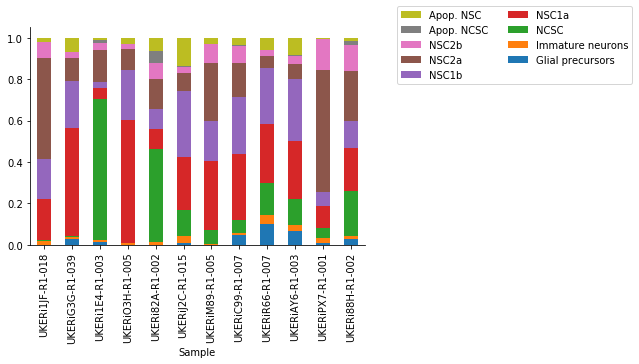

In [8]:
ax = pd.crosstab(adata.obs['Donor'], adata.obs['louvain_final'], normalize=0).plot(kind='bar', stacked=True, legend=False)#, color=ct_colors)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.08,1.12,0,0), ncol=2)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xlabel('Sample')
plt.savefig('../figures/Donor_celltype_composition.pdf', bbox_inches='tight')

plt.show()

# Composition per cell type

In [27]:
adata.obs['louvain_final'].cat.reorder_categories(['NSC1a', 'NSC1b', 'NSC2a', 'NSC2b', 'Immature neurons', 
                                                   'Apop. NSC', 'NCSC', 'Apop. NCSC', 'Glial precursors'], 
                                                  inplace=True)

Text(0.5, 0, 'Sample')

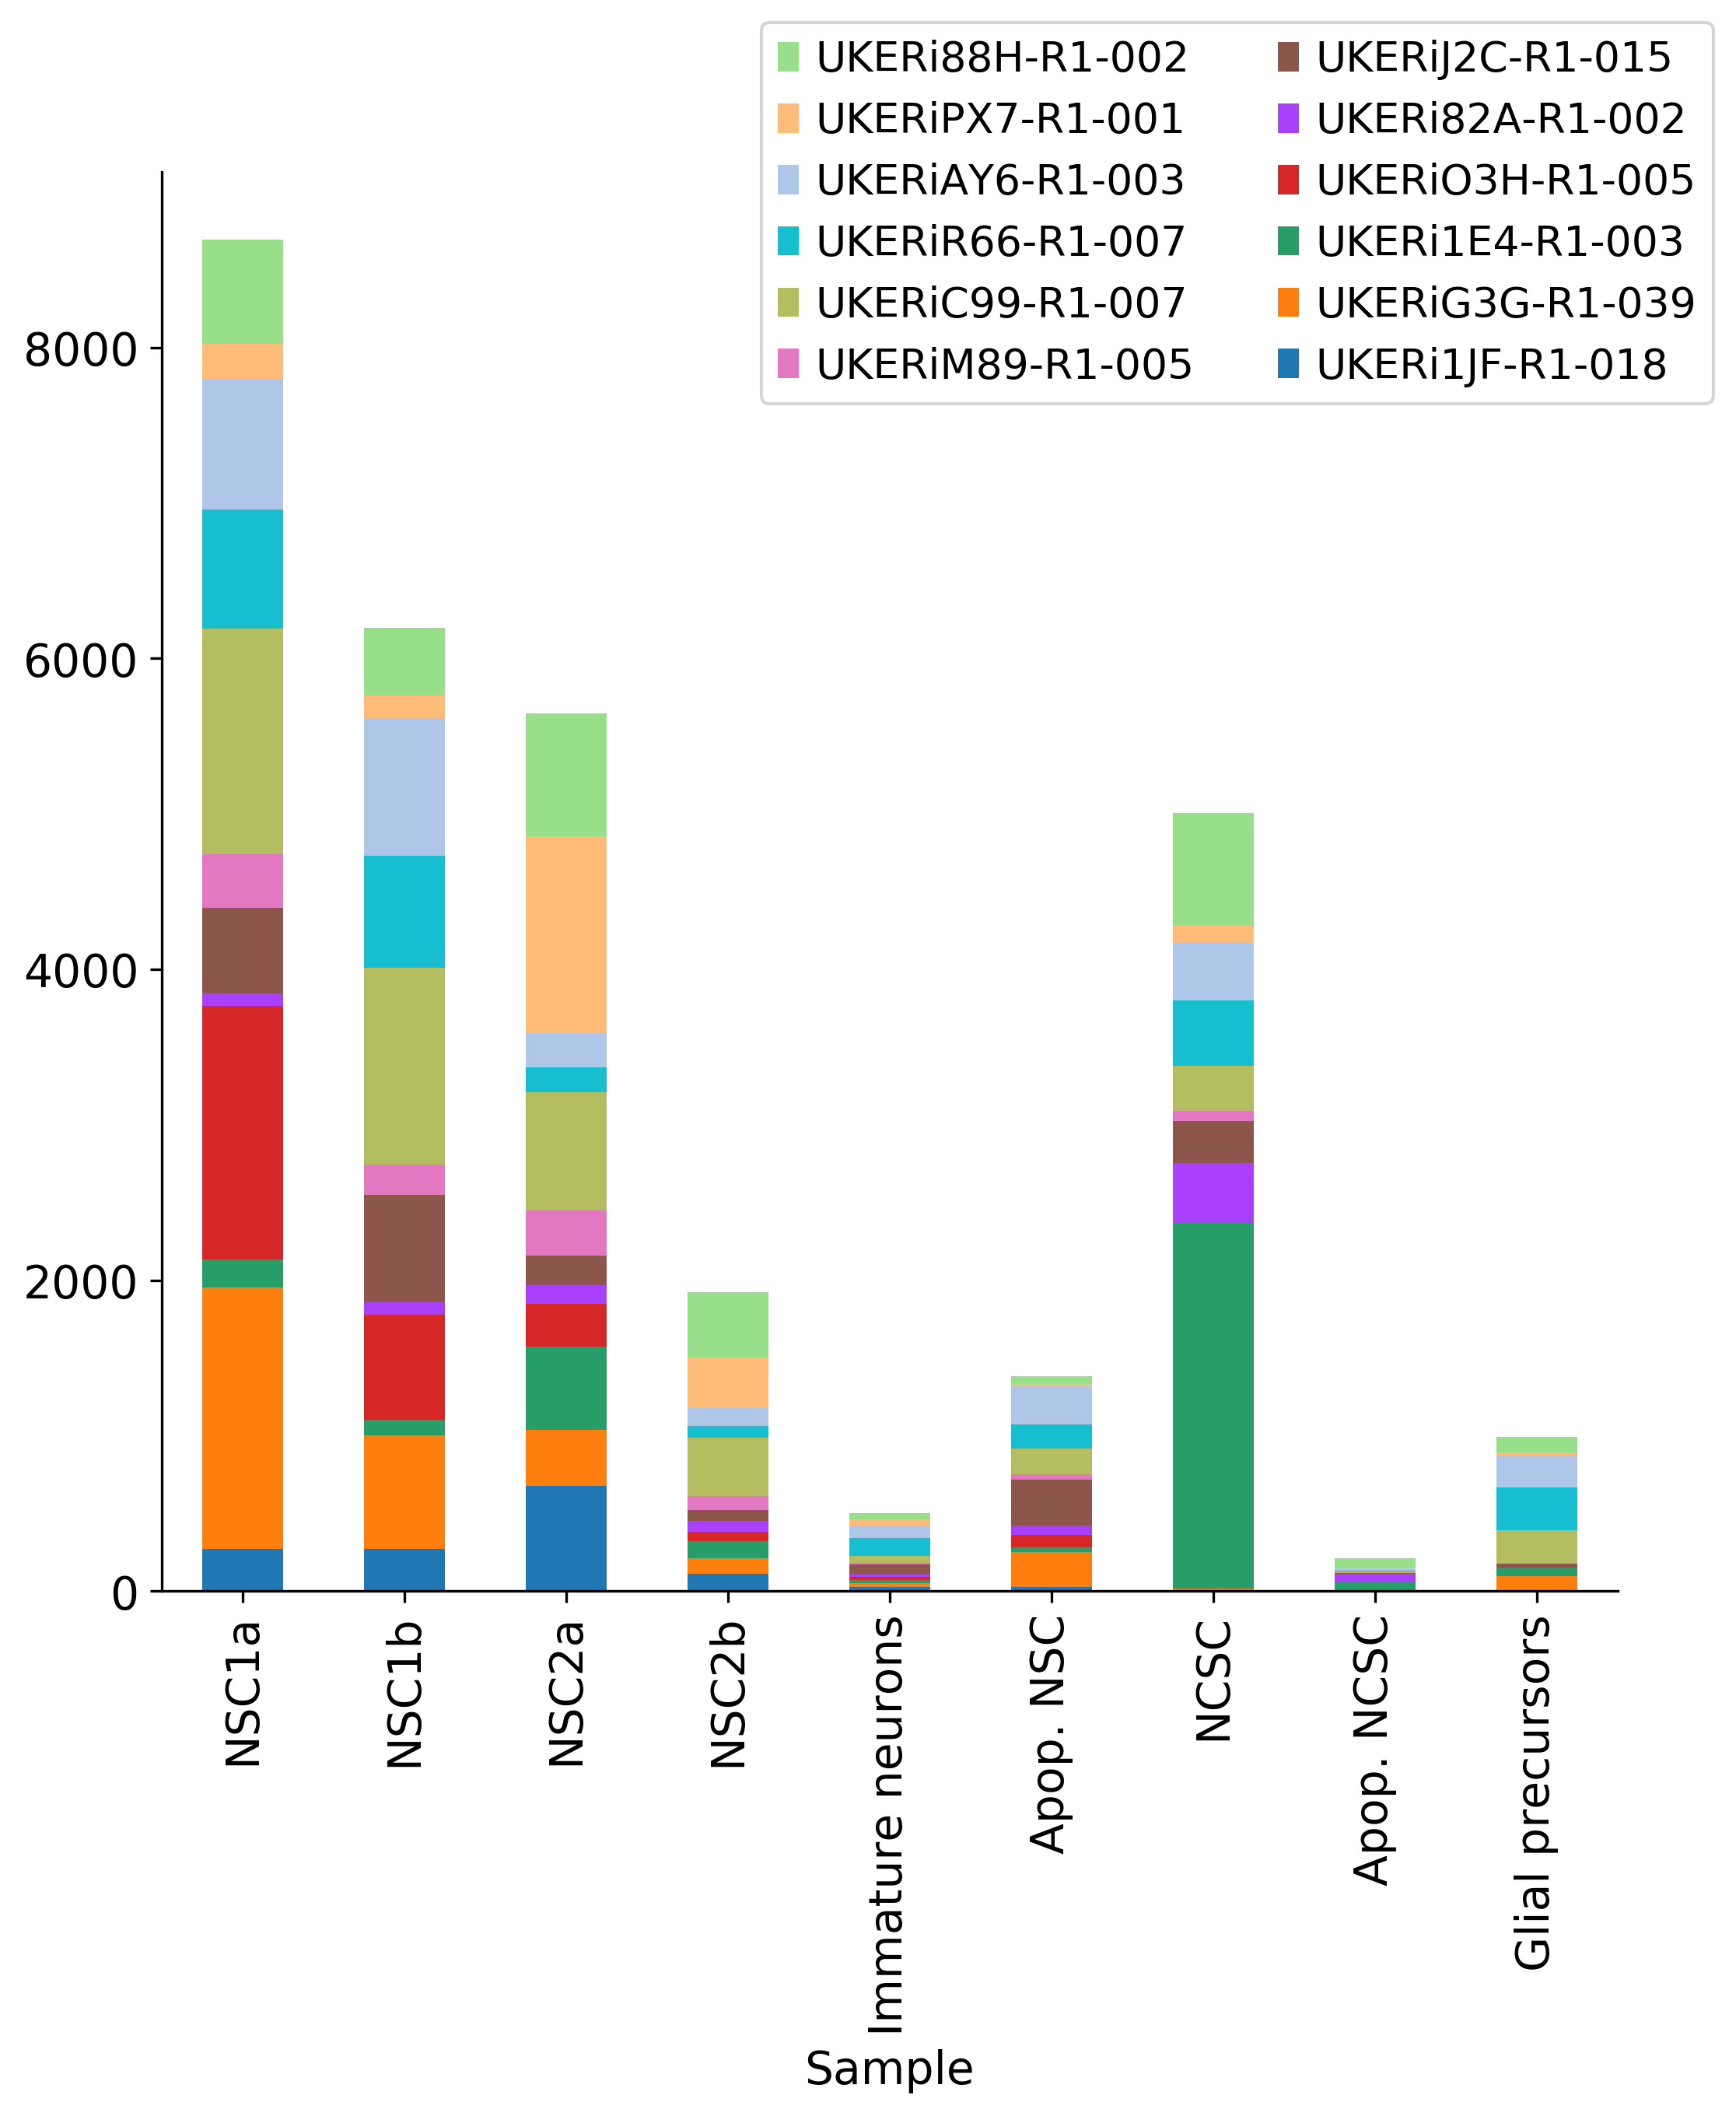

In [30]:
ax = pd.crosstab(adata.obs['louvain_final'], adata.obs['Donor'], normalize=False).plot(kind='bar', stacked=True, legend=False)#, color=ct_colors)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.08,1.12,0,0), ncol=2)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.grid(False)
plt.xlabel('Sample')
plt.savefig('../figures/Celltype_donor_composition_unnormalized.pdf', bbox_inches='tight')
plt.show()

Text(0.5, 0, 'Sample')

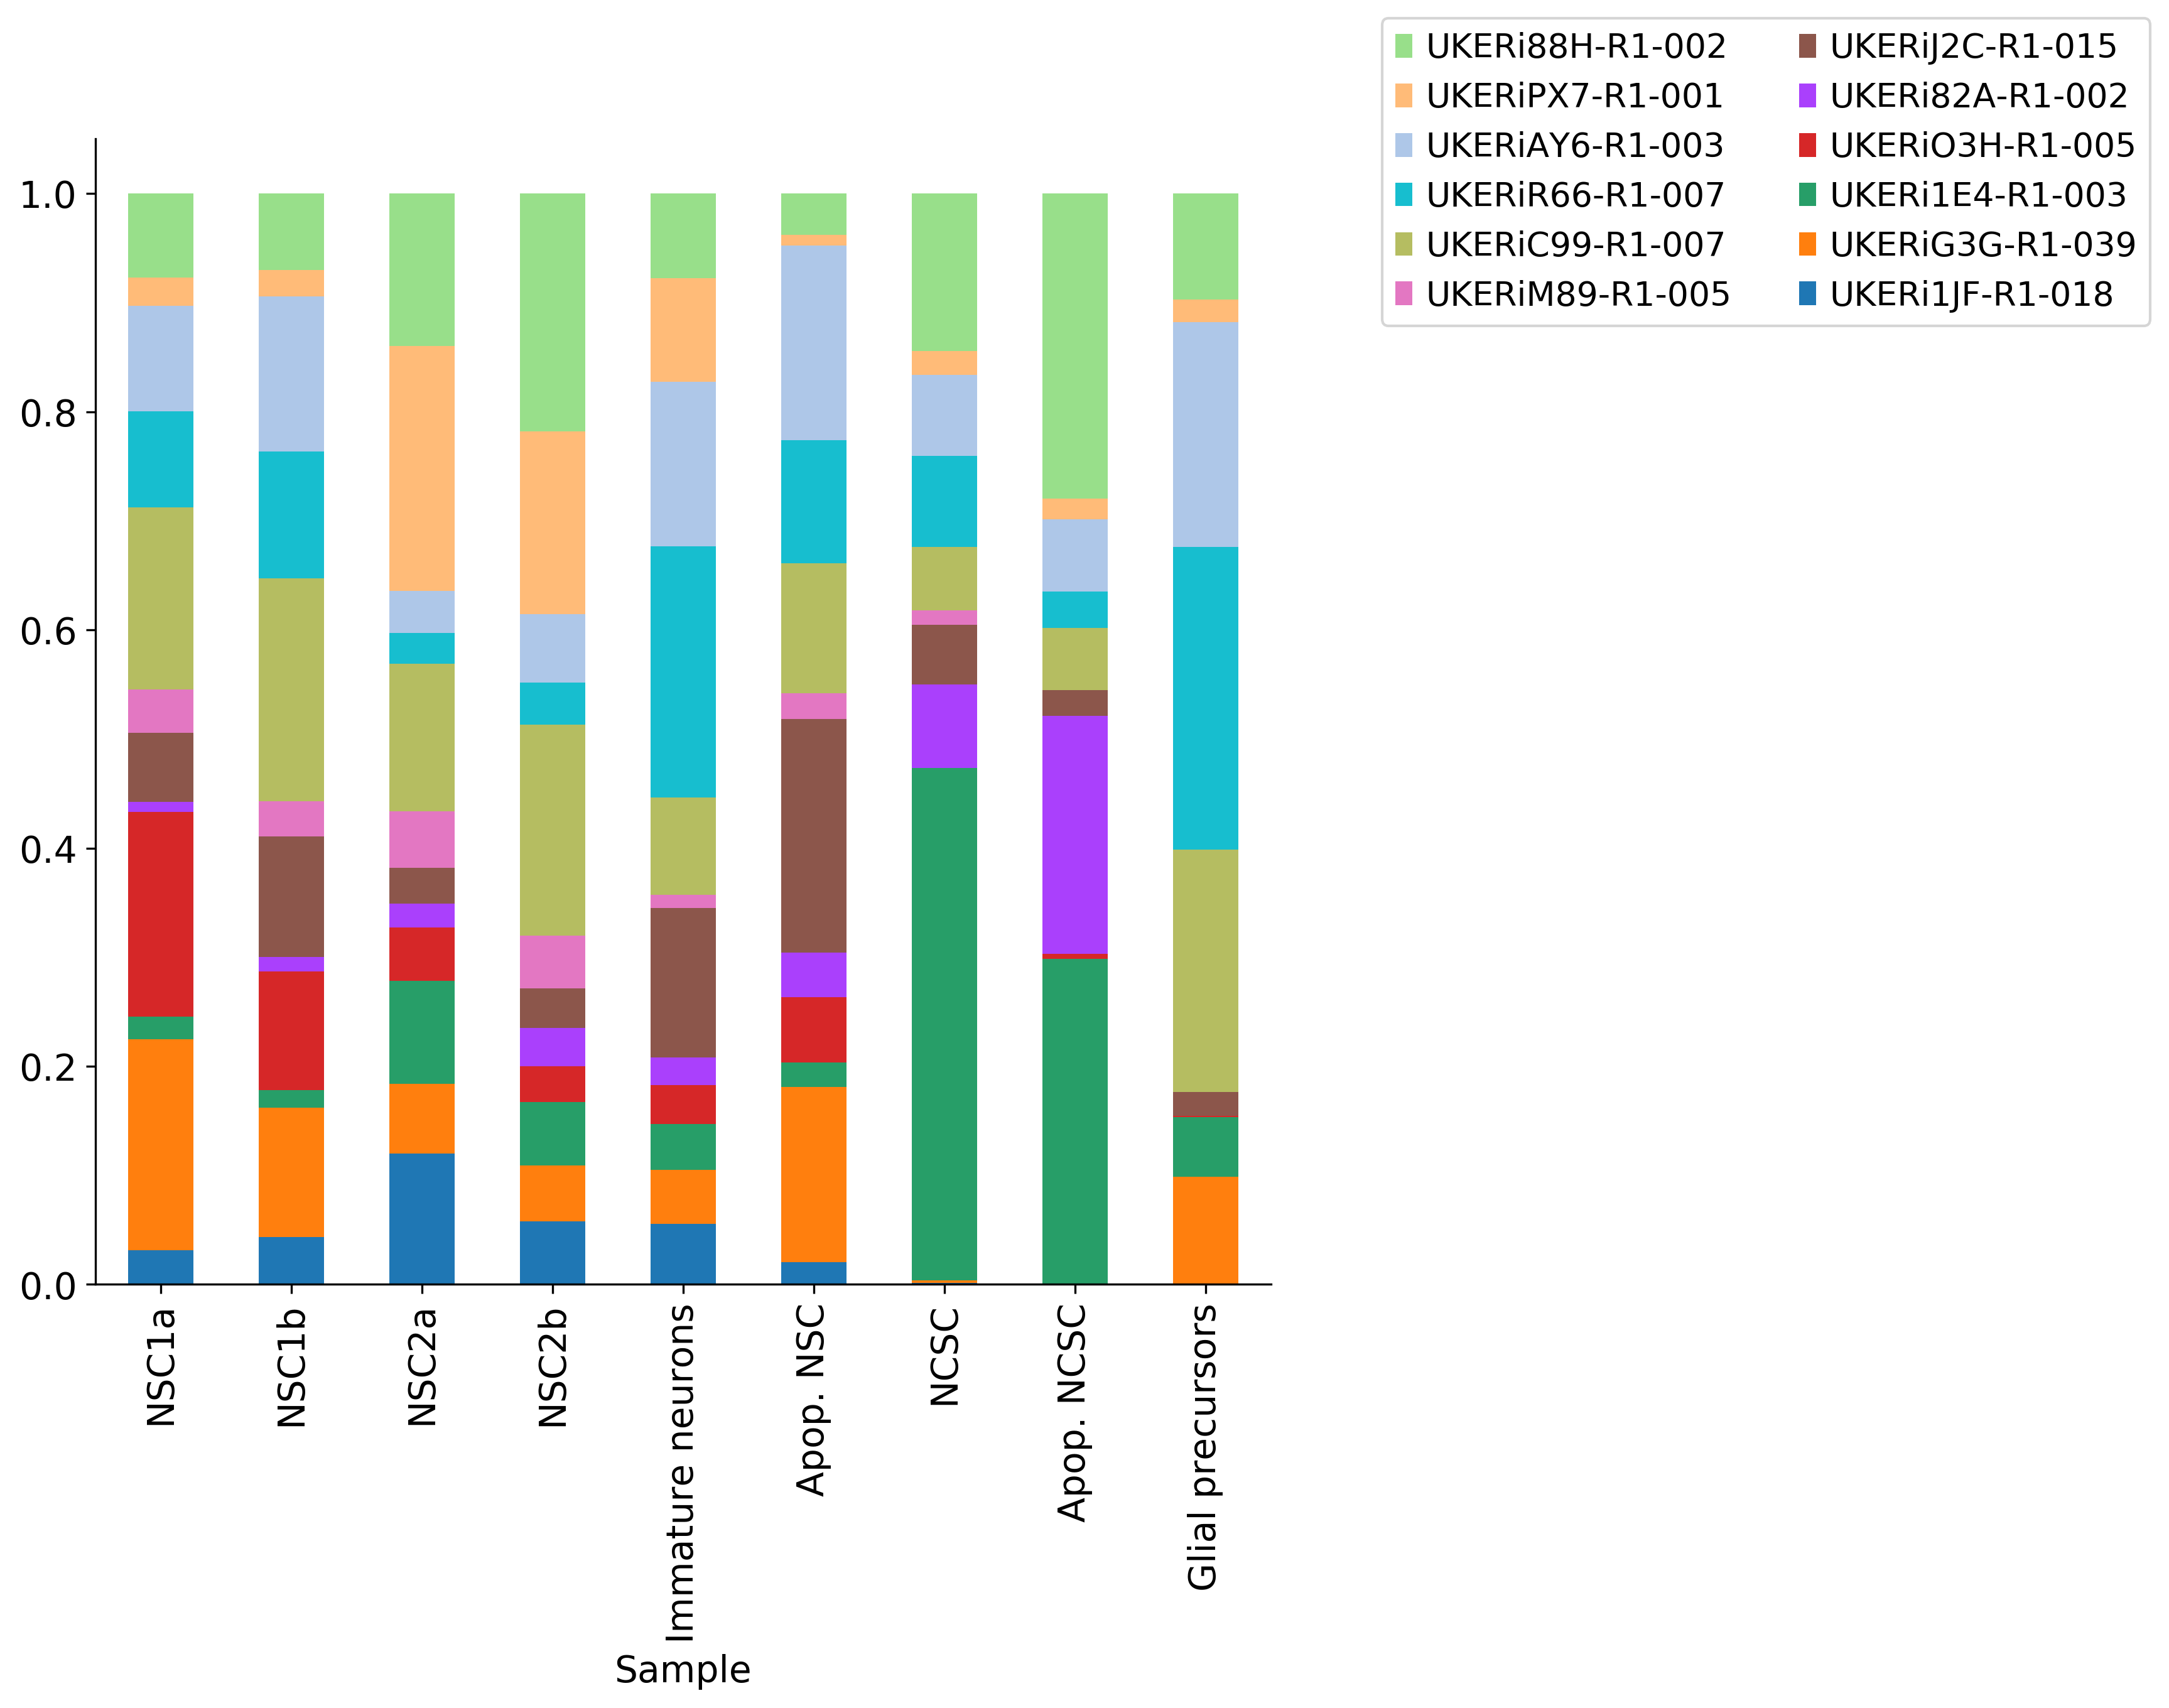

In [28]:
ax = pd.crosstab(adata.obs['louvain_final'], adata.obs['Donor'], normalize=0).plot(kind='bar', stacked=True, legend=False)#, color=ct_colors)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.08,1.12,0,0), ncol=2)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.grid(False)
plt.xlabel('Sample')
plt.savefig('../figures/Celltype_donor_composition.pdf', bbox_inches='tight')
plt.show()

Text(0.5, 0, 'Sample')

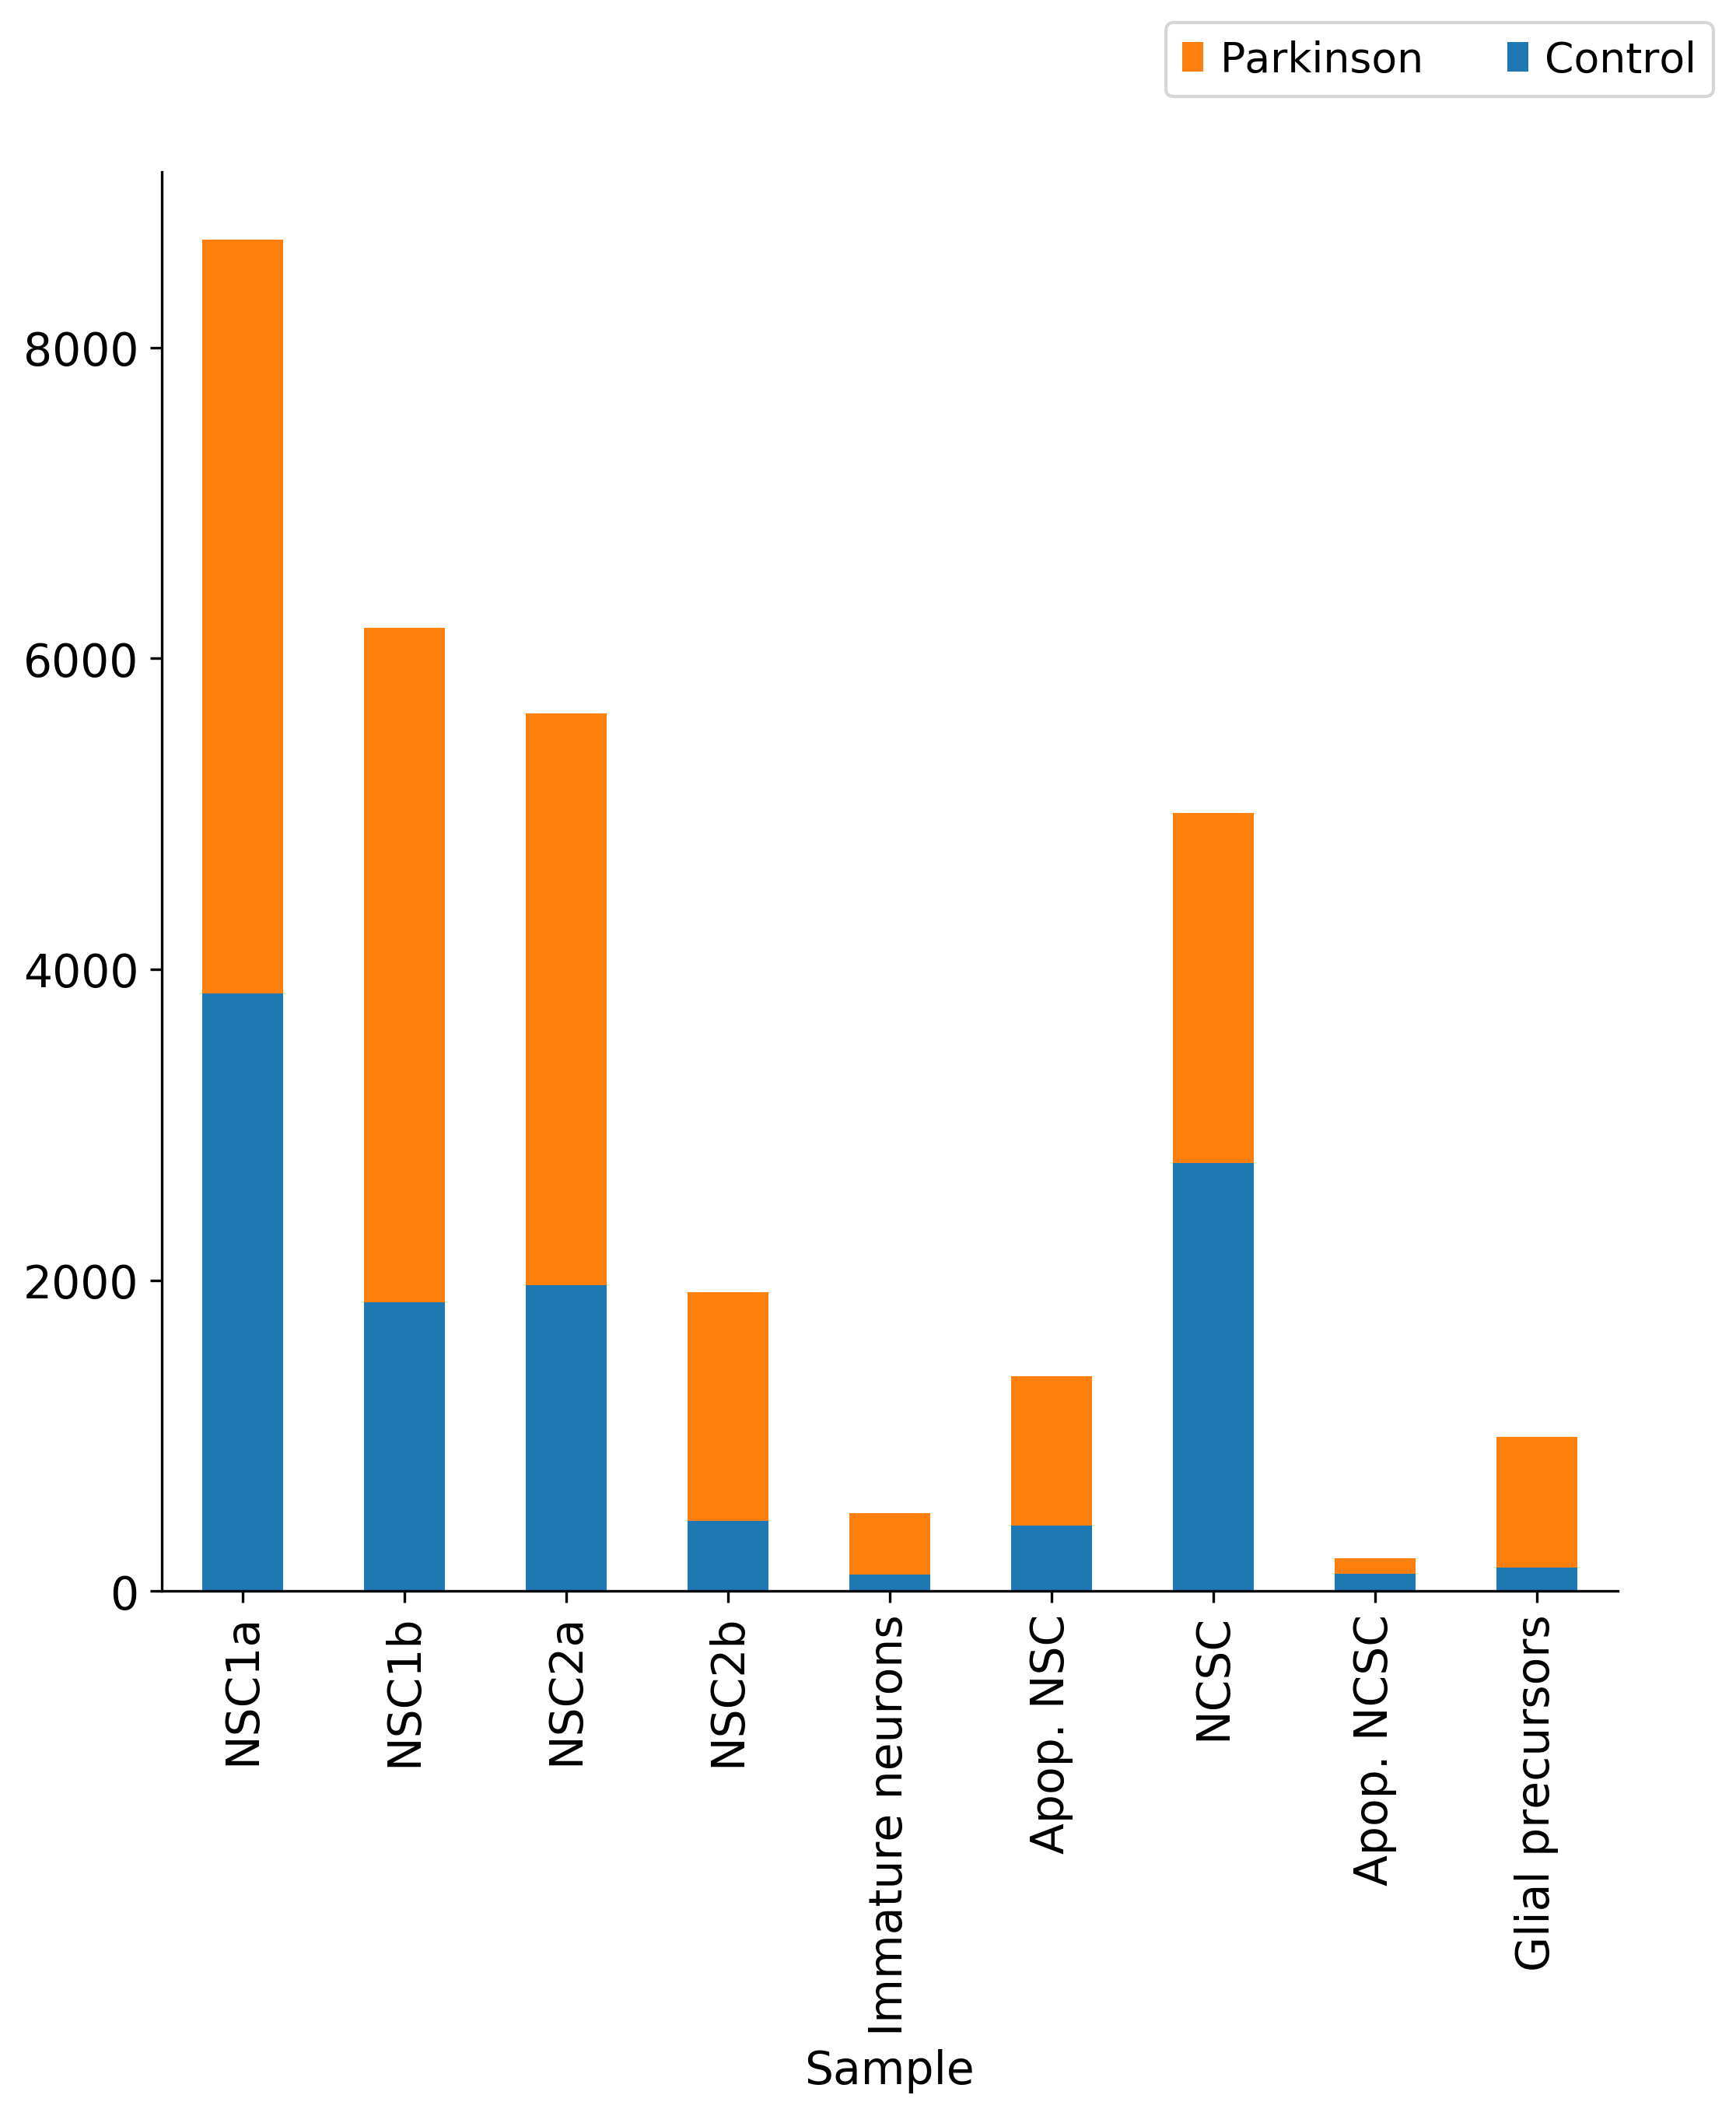

In [31]:
ax = pd.crosstab(adata.obs['louvain_final'], adata.obs['condition'], normalize=False).plot(kind='bar', stacked=True, legend=False)#, color=ct_colors)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.08,1.12,0,0), ncol=2)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.grid(False)
plt.xlabel('Sample')
plt.savefig('../figures/Celltype_condition_composition_unnormalized.pdf', bbox_inches='tight')
plt.show()

Text(0.5, 0, 'Sample')

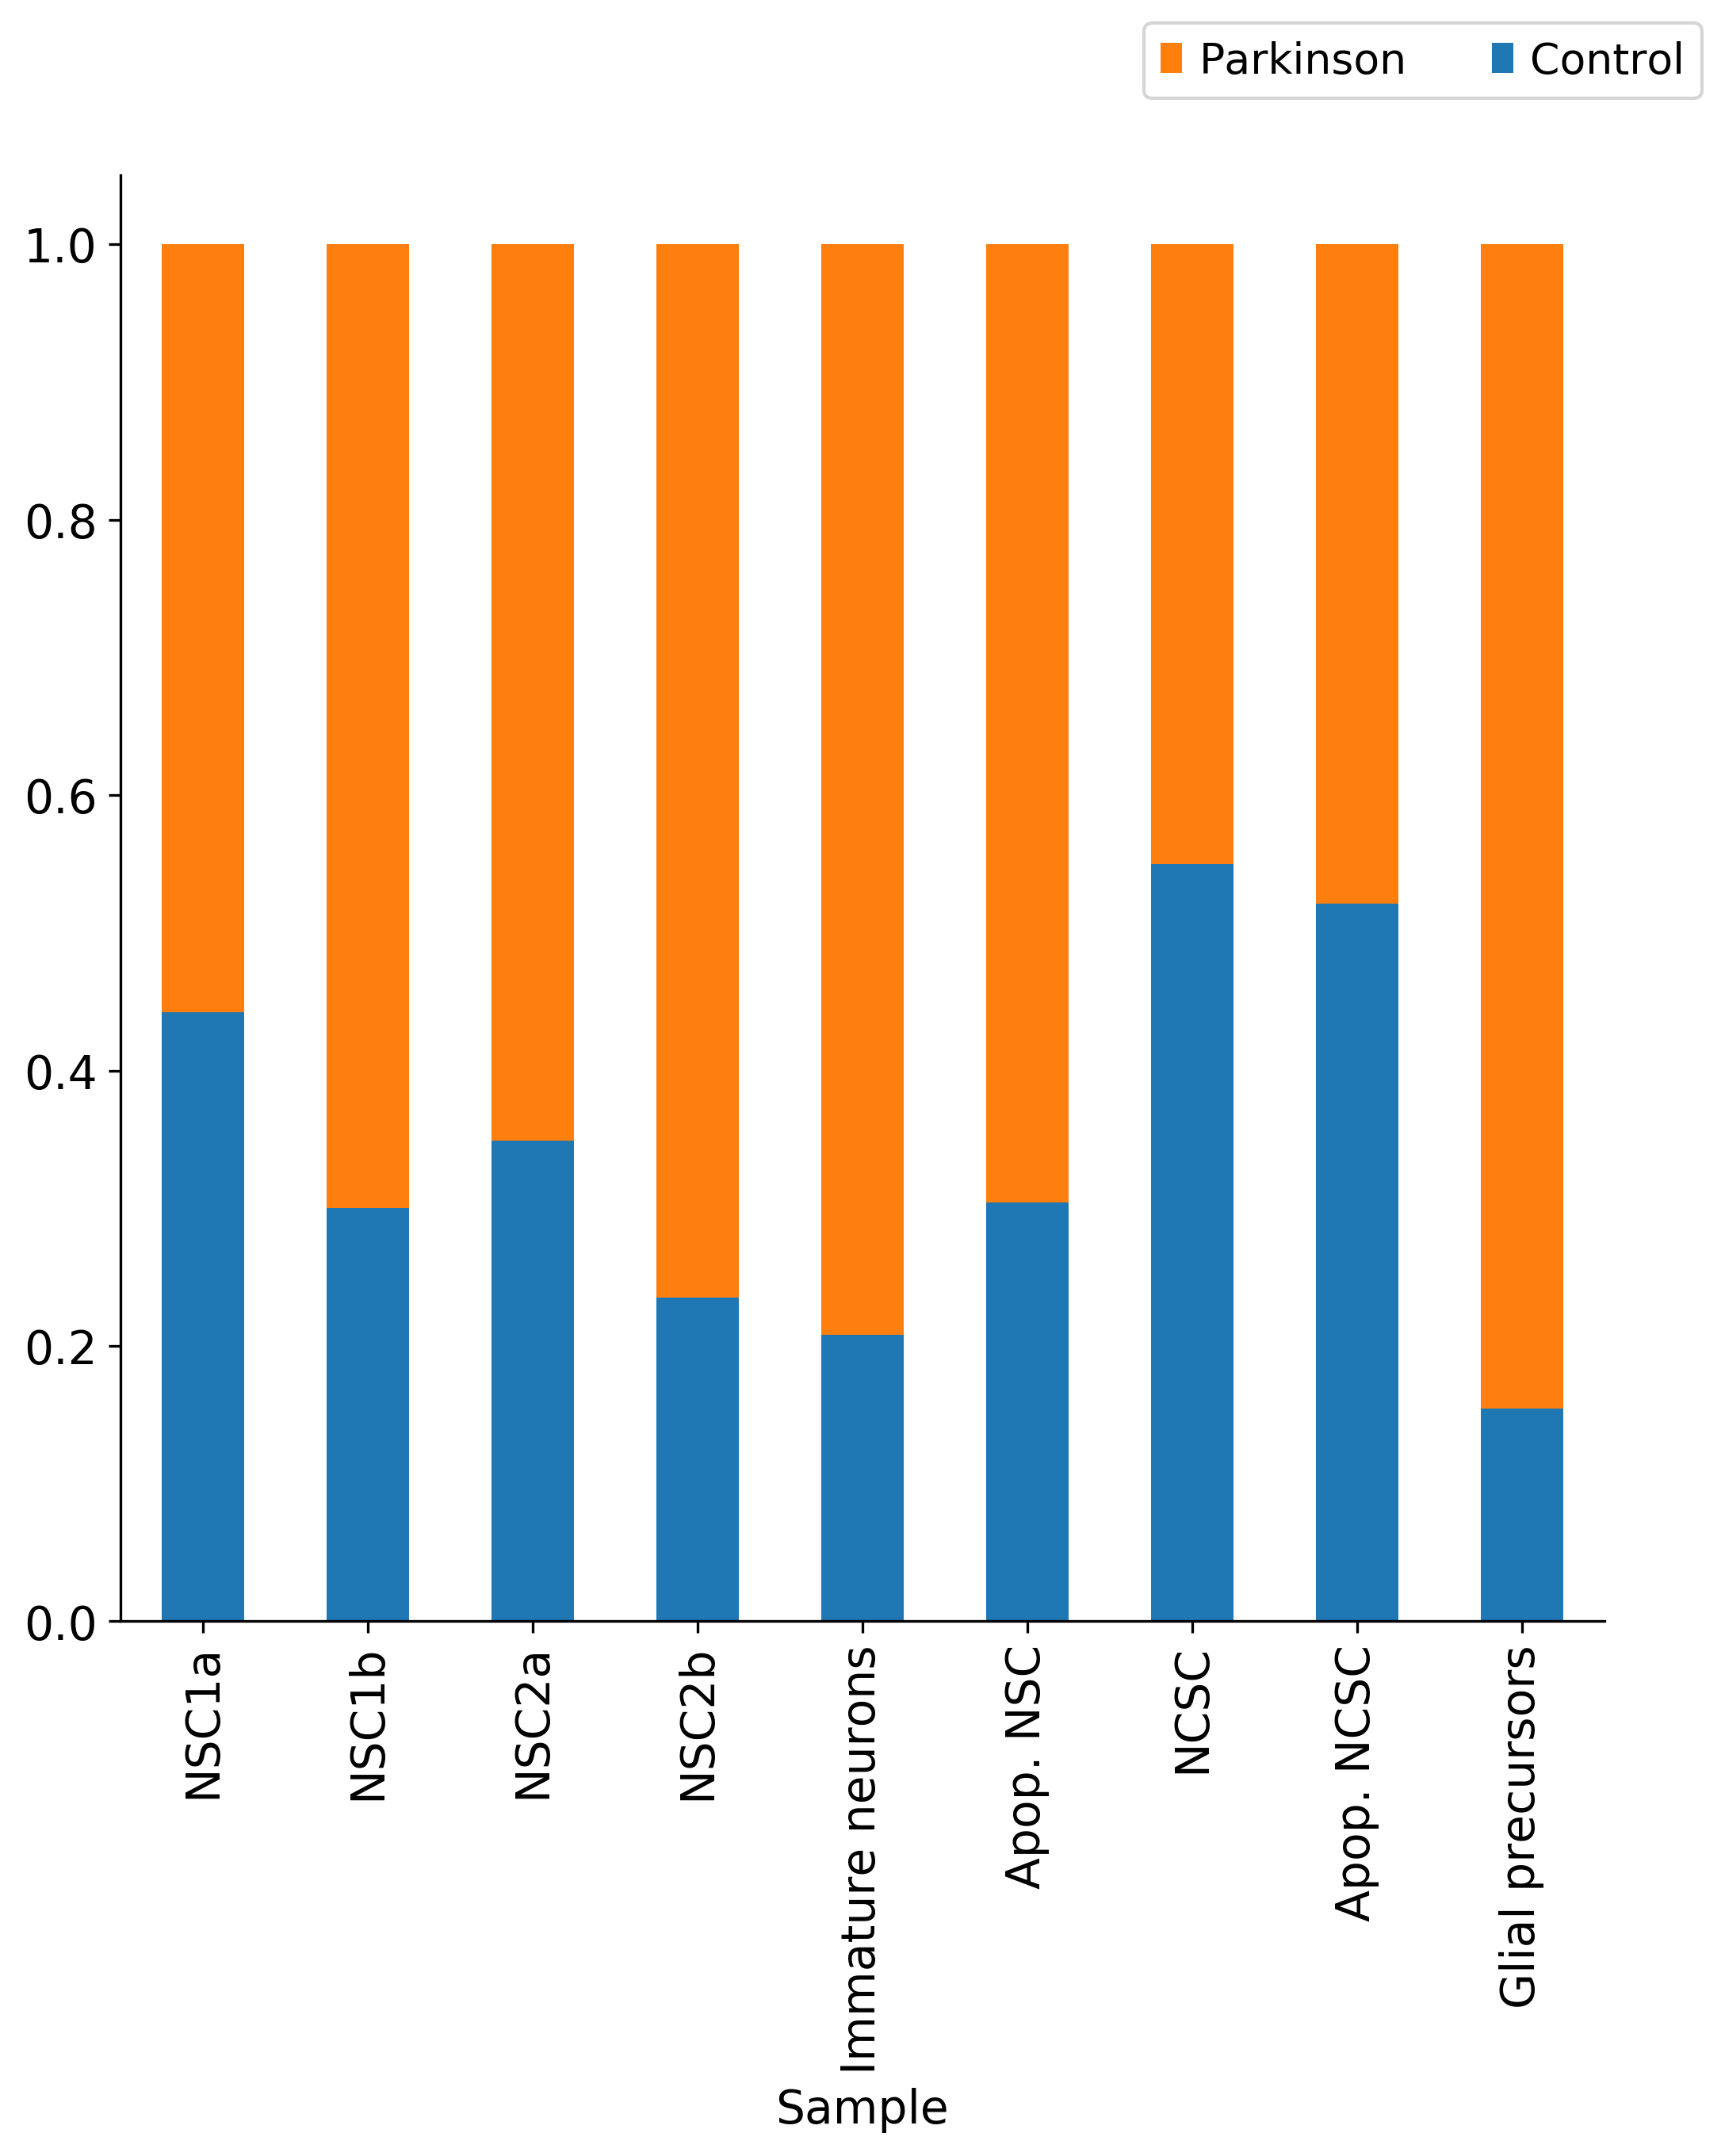

In [29]:
ax = pd.crosstab(adata.obs['louvain_final'], adata.obs['condition'], normalize=0).plot(kind='bar', stacked=True, legend=False)#, color=ct_colors)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.08,1.12,0,0), ncol=2)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.grid(False)
plt.xlabel('Sample')
plt.savefig('../figures/Celltype_condition_composition.pdf', bbox_inches='tight')
plt.show()

# No CC plots

In [9]:
adata_full_noCC_velo = '/storage/groups/ml01/workspace/malte.luecken/2019_wurst_demuxlet/Main_study/processed_data/ipsc_ipd_patients_full_noCC_scvelo.h5ad'

In [12]:
adata_noCC_velo = sc.read(adata_full_noCC_velo)

In [13]:
adata_noCC_velo

AnnData object with n_obs × n_vars = 24956 × 15705 
    obs: 'Demux_state', 'Donor', 'Lane', 'Number of genes', 'Total counts', 'age', 'condition', 'donor', 'gender', 'log_counts', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'total_counts', 'years_of_illness', 'S_score', 'G2M_score', 'phase', 'louvain_r1', 'louvain_r0.5', 'louvain_r0.2', 'score', 'louvain_r0.2_0_sub', 'louvain_r0.2_0_4_sub', 'louvain_r0.2_0_3_sub', 'dpt_pseudotime', 'louvain_r0.2_noCC', 'louvain_r0.2_noCC_3_sub', 'condition_val', 'apop_score_corr', 'Ferroptosis_pos_corr', 'Ferroptosis_neg_corr', 'Apoptosis_pos_corr', 'Apoptosis_neg_corr', 'Necroptosis_pos_corr', 'Autophagy_pos_corr', 'Pathanatos_pos_corr', 'louvain_r0.2_noCC_NCSC_sub', 'louvain_r0.2_noCC_NCSC1_sub', 'test_groups', 'louvain_final', 'sample', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'louvain_final_coarse', 'velocity_self_transition', 'NSC_root_cell'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'Ac

In [14]:
sc.set_figure_params(dpi=150, dpi_save=300, format='svg')

In [16]:
from matplotlib.pyplot import rcParams

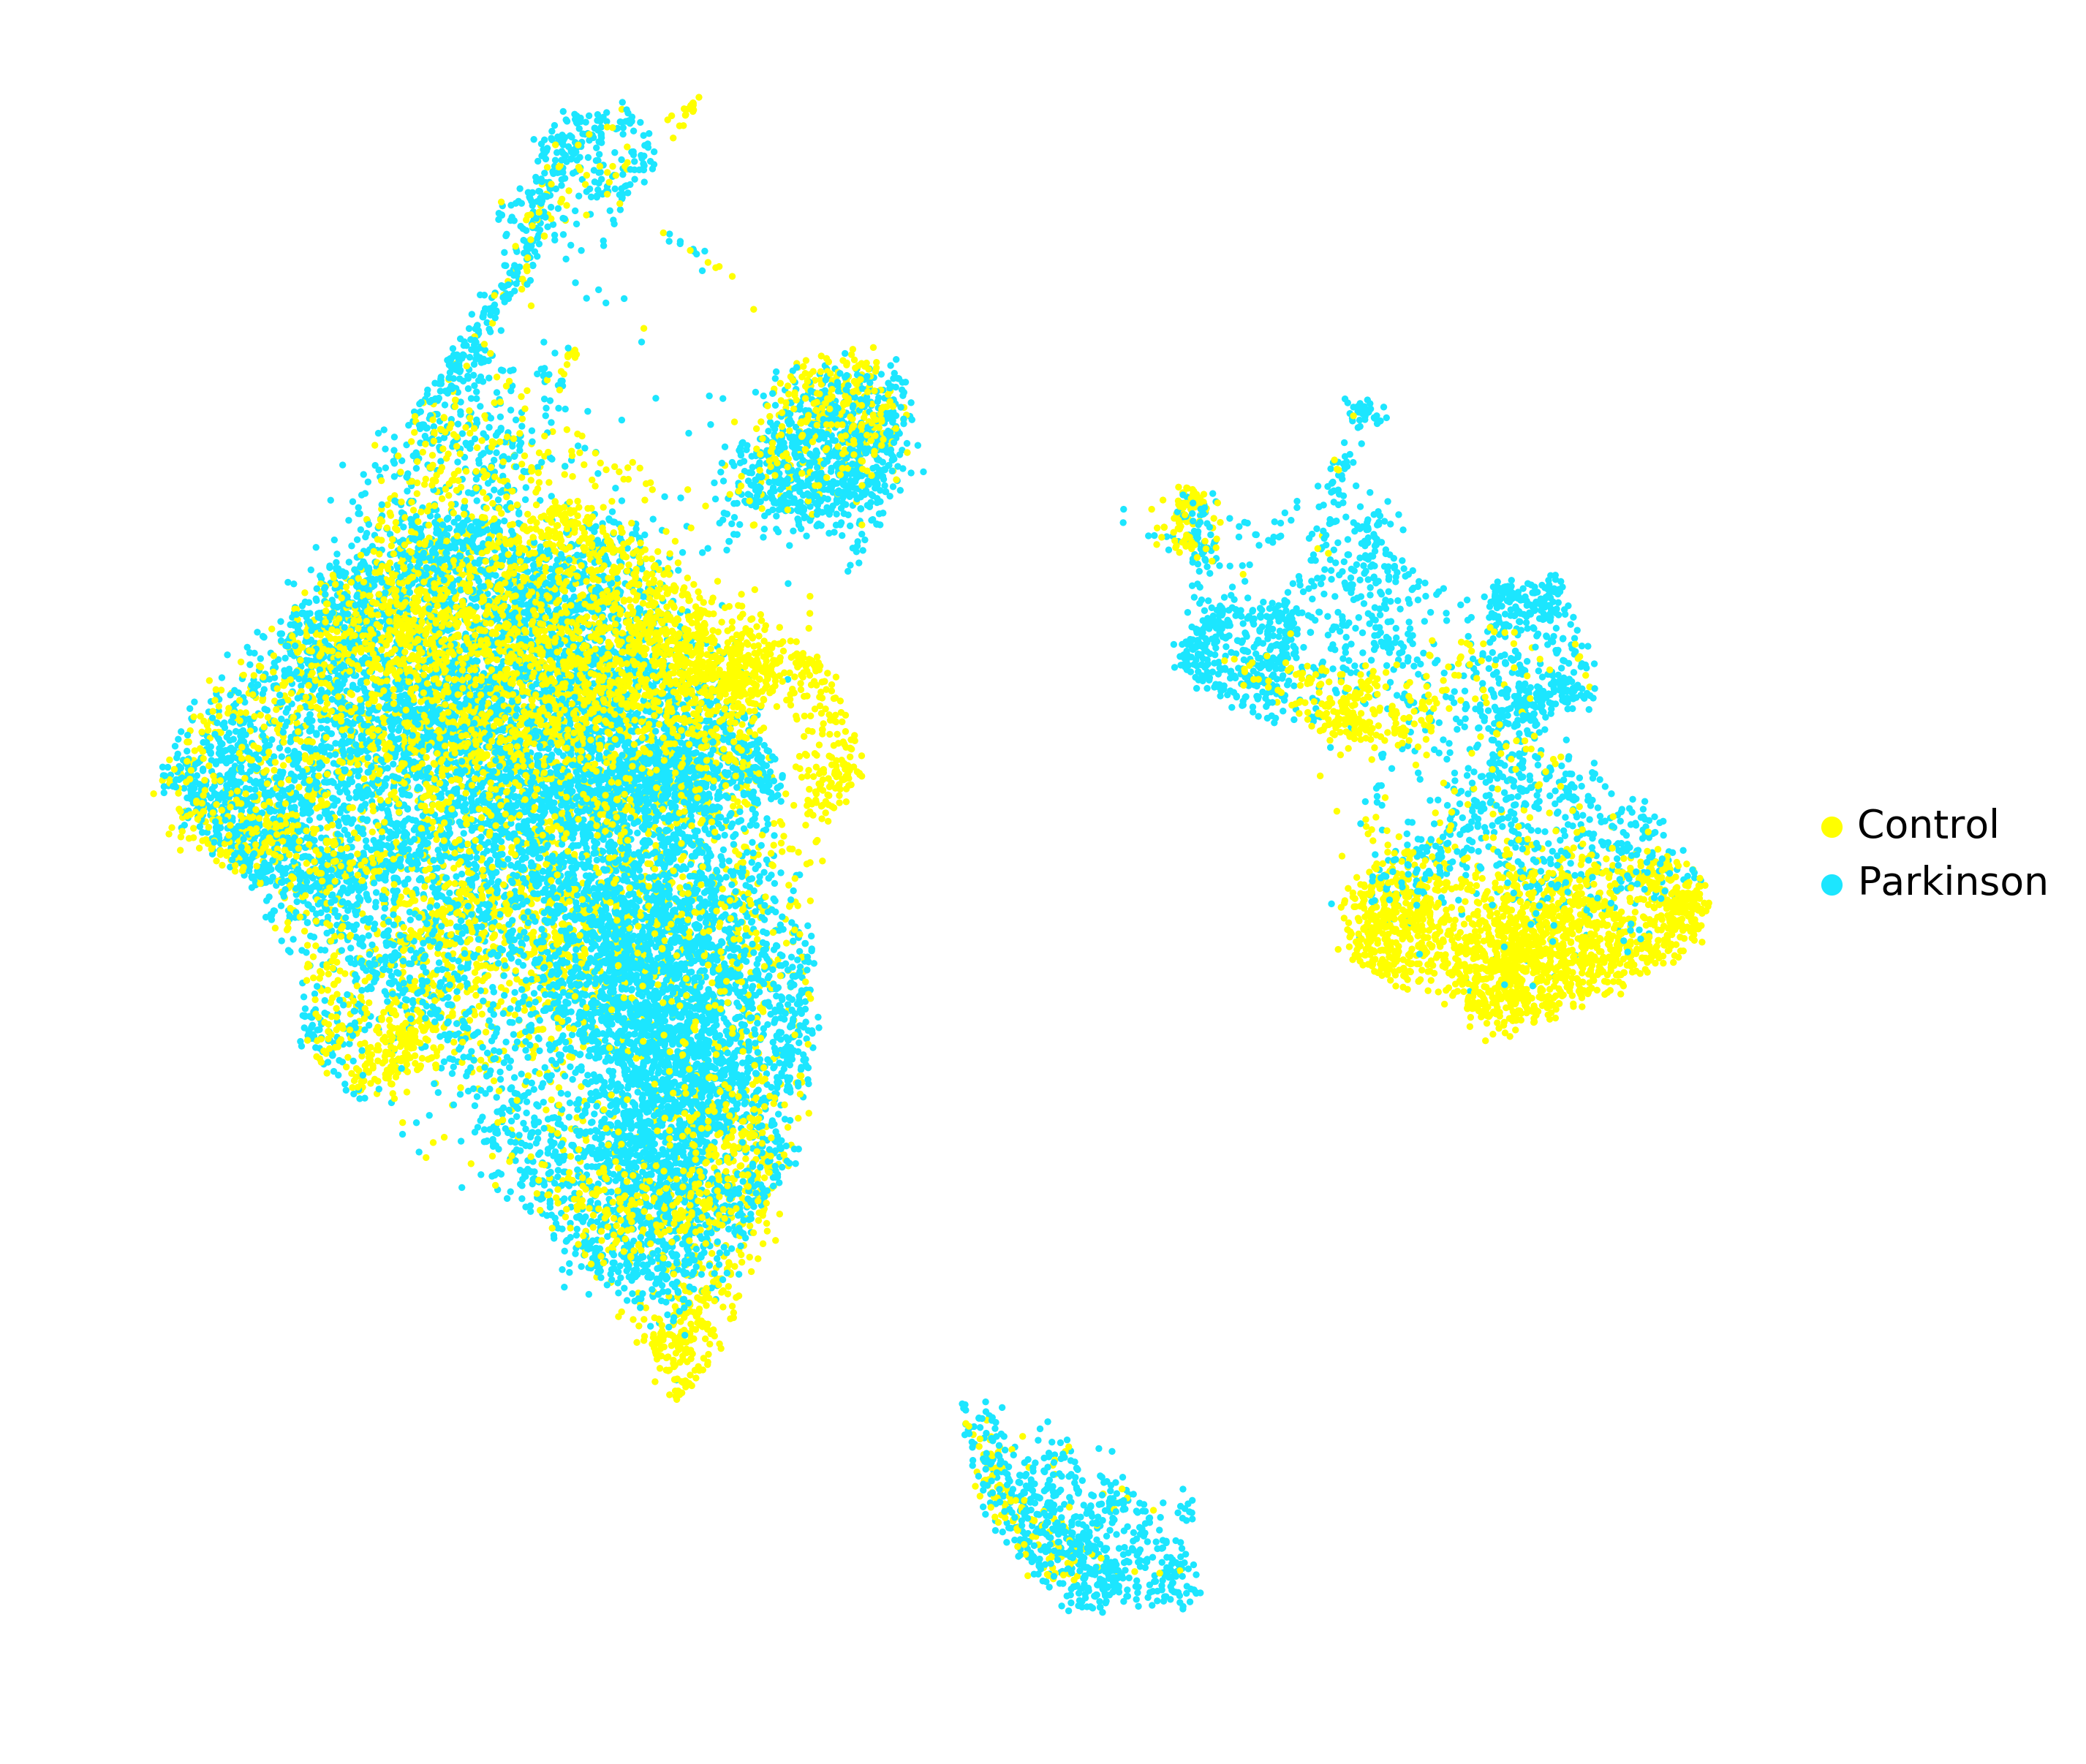

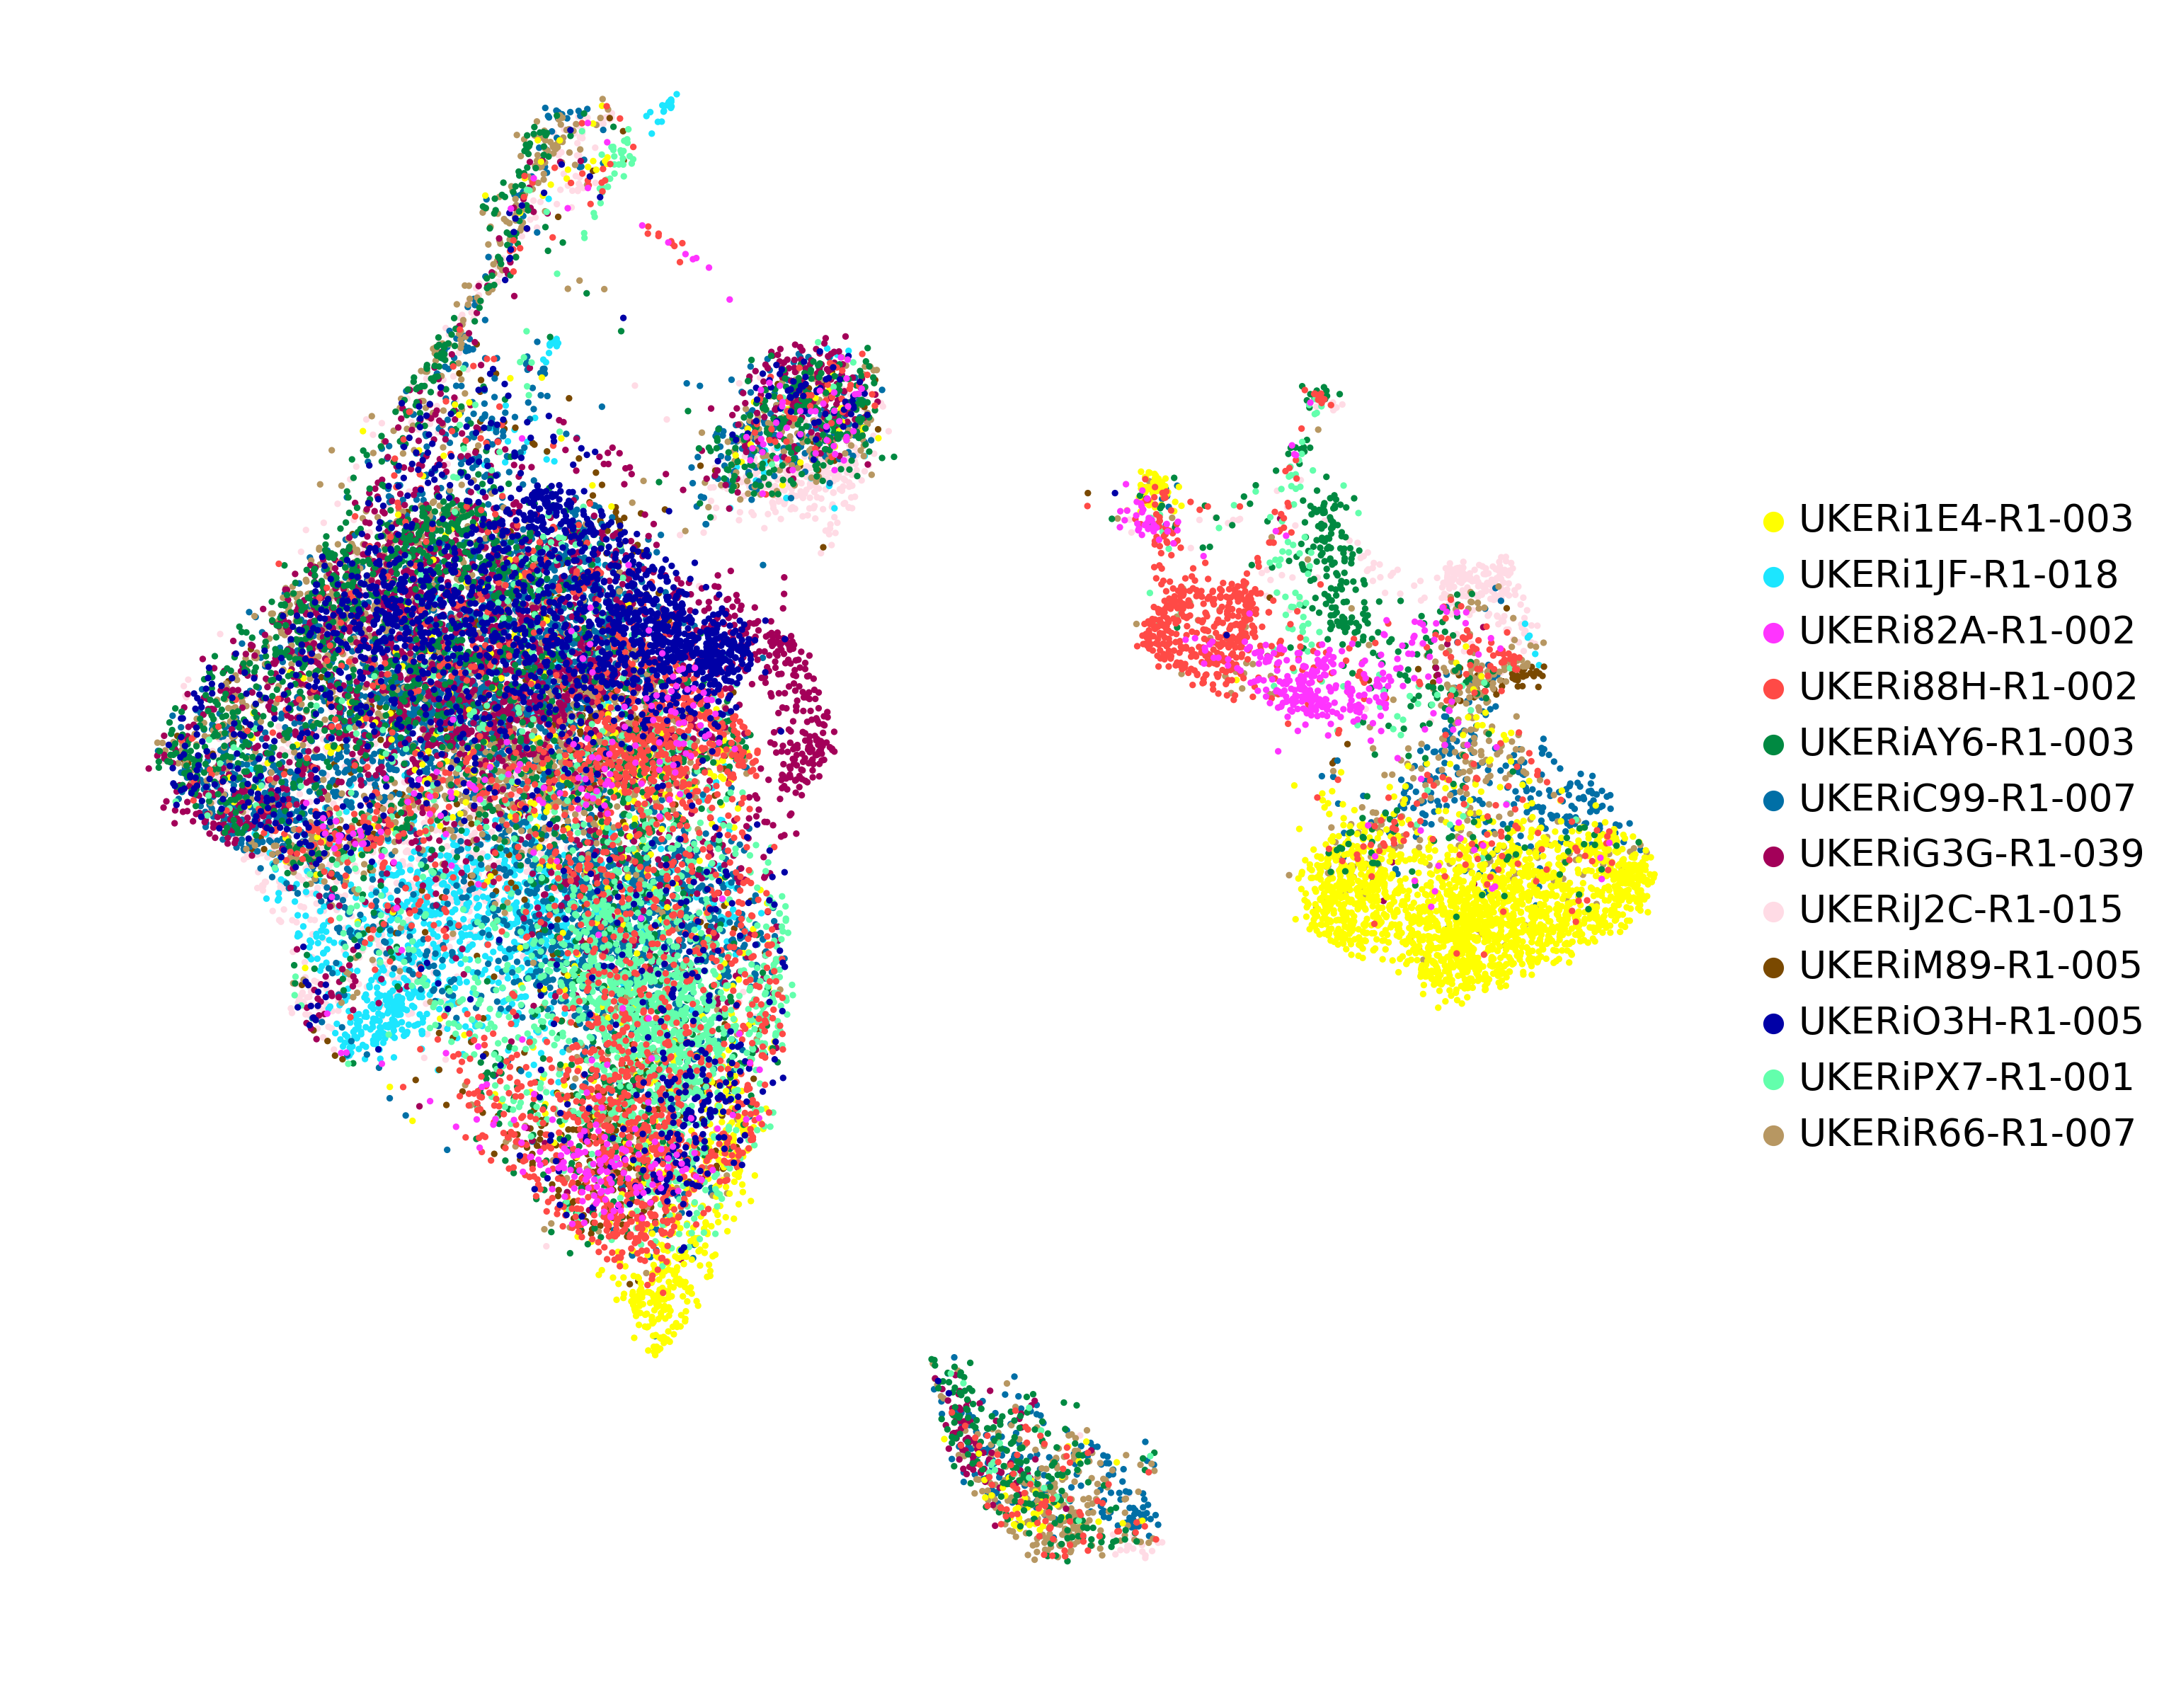

In [18]:
#Plot visualizations
rcParams['figure.figsize']=(10,10)
sc.pl.umap(adata_noCC_velo, color='condition', size=20, save='_figure_noCC_condition.svg', title="", frameon=False, sort_order=False)
sc.pl.umap(adata_noCC_velo, color='Donor', size=20, save='_figure_noCC_donor.svg', title="", frameon=False, sort_order=False)
rcParams['figure.figsize']=(8,8)